### Dataset selection

In [11]:
import pandas as pd

from gnn_scheduler.jssp import load_utils

In [12]:
metadata = load_utils.load_metadata()

In [13]:
df = pd.DataFrame(metadata)
df

,name,jobs,machines,optimum,path,bounds
0,abz5,10,10,1234.0,raw/abz5,NaN
1,abz6,10,10,943.0,raw/abz6,NaN
2,abz7,20,15,656.0,raw/abz7,NaN
3,abz8,20,15,NaN,raw/abz8,"{'upper': 665, 'lower': 645}"
4,abz9,20,15,678.0,raw/abz9,NaN
...,...,...,...,...,...,...
157,ta76,100,20,5342.0,raw/ta76,NaN
158,ta77,100,20,5436.0,raw/ta77,NaN
159,ta78,100,20,5394.0,raw/ta78,NaN
160,ta79,100,20,5358.0,raw/ta79,NaN


<Axes: xlabel='jobs', ylabel='machines'>

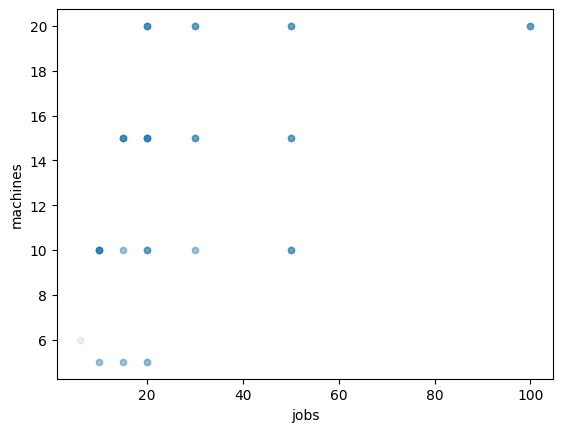

In [14]:
df.plot(x="jobs", y="machines", kind="scatter", alpha=0.1)

<Axes: xlabel='jobs'>

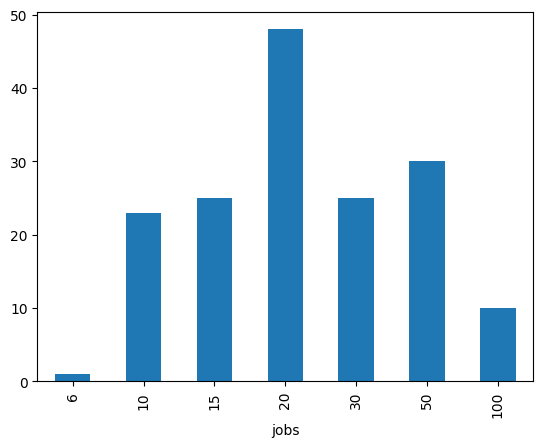

In [15]:
df.jobs.value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='machines'>

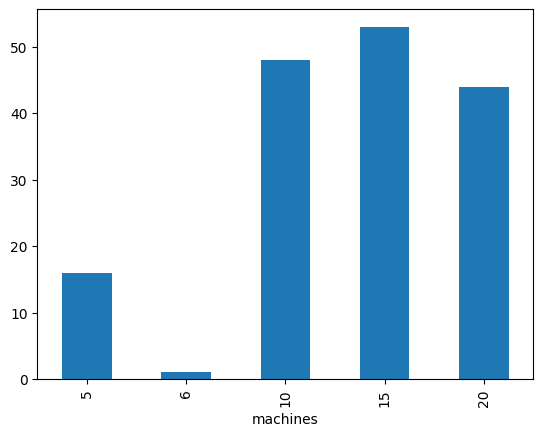

In [16]:
df.machines.value_counts().sort_index().plot(kind="bar")

<Axes: ylabel='Frequency'>

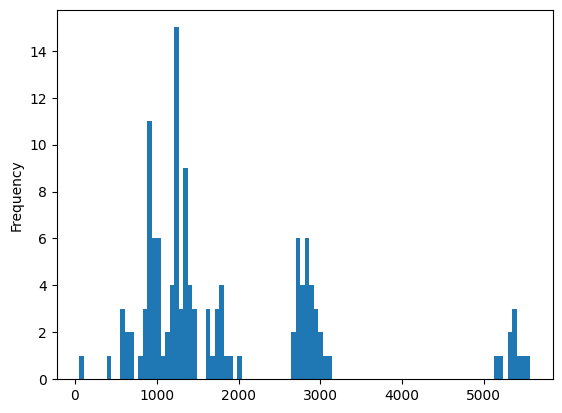

In [17]:
df.optimum.plot(kind="hist", bins=100)

<Axes: xlabel='jobs'>

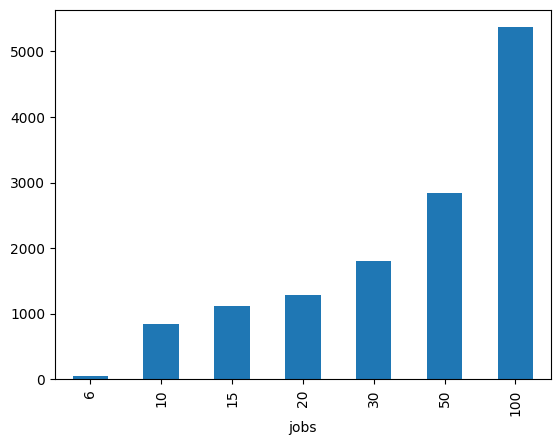

In [18]:
# Let's group by the number of jobs and analyze the optimum
df.groupby("jobs").optimum.mean().plot(kind="bar")

<Axes: xlabel='machines'>

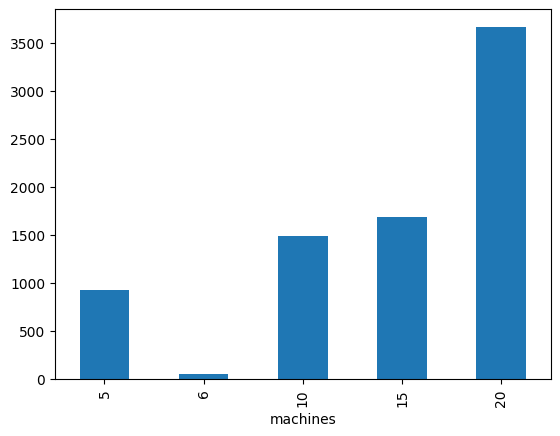

In [19]:
# Let's group by the number of machines and analyze the optimum
df.groupby("machines").optimum.mean().plot(kind="bar")

In [20]:
# For the dataset selection we can filter by the number of jobs and machines
# For example, we can select all the instances with 20 or less jobs and 10 or 
# less machines
selected_instances = df[(df.jobs <= 20) & (df.machines <= 10)]
len(selected_instances)

50

In [21]:
len(selected_instances) / len(df)

0.30864197530864196

In [22]:
selected_instances

,name,jobs,machines,optimum,path,bounds
0,abz5,10,10,1234.0,raw/abz5,NaN
1,abz6,10,10,943.0,raw/abz6,NaN
5,ft06,6,6,55.0,raw/ft06,NaN
6,ft10,10,10,930.0,raw/ft10,NaN
7,ft20,20,5,1165.0,raw/ft20,NaN
8,la01,10,5,666.0,raw/la01,NaN
9,la02,10,5,655.0,raw/la02,NaN
10,la03,10,5,597.0,raw/la03,NaN
11,la04,10,5,590.0,raw/la04,NaN
12,la05,10,5,593.0,raw/la05,NaN


Let's see how many edges swv04 has

In [23]:
from gnn_scheduler.jssp import load_from_benchmark


swv04 = load_from_benchmark("swv04")
swv04.disjunctive_graph.number_of_edges()

4020

In [24]:
swv04.disjunctive_graph.number_of_nodes()

202

In [25]:
la26 = load_from_benchmark("la26")
la26.disjunctive_graph.number_of_edges()

4020

In [27]:
from gnn_scheduler.jssp import load_all_from_benchmark

In [28]:
selected_instances_names = selected_instances.name.values
len(load_all_from_benchmark(list_of_instances=selected_instances_names))

50

In [29]:
len(selected_instances)

50

In [30]:
len(load_all_from_benchmark(max_jobs=20, max_machines=10))

50

In [35]:
instances = load_all_from_benchmark(max_jobs=20, max_machines=10)
instances_names = {instance.name for instance in instances}
assert set(selected_instances_names) == instances_names


In [36]:
instances = load_all_from_benchmark(list_of_instances=selected_instances_names)
instances_names = {instance.name for instance in instances}
assert set(selected_instances_names) == instances_names